In [27]:
#Importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [28]:
df=pd.read_csv('ecommerce_churn_data.csv')

In [29]:
#Checking data set

df.head()

,user_id,platform,market_country,user_creation_datetime,confirmation_datetime,first_purchase_datetime,last_purchase_datetime,last_segment_recorded,longevity,total_sales,...,year_revenue_eur,historic_revenue_eur,month_average_order_value,quarter_aov,year_aov,year_plat_cntry_aov,previous_year_plat_cntry_aov,historic_aov,churn_factor,status
0,a571a717903d731460c3f8b012897aa6,4128403e5dad4f40eb5c79a92a5719c9,6b681da4aa6e2f33a5f06ff660ba0e9e,2019-06-10 17:10:15 UTC,2019-06-10 17:10:15 UTC,2019-08-19 16:01:43 UTC,2021-03-06 18:21:17 UTC,S,974,36,...,173.47,173.47,5.246667,17.980,14.455833,6.675167,6.062347,14.455833,20.098765,churned
1,c681dc7c20837e3ea7a0c0531e3d4eb6,4128403e5dad4f40eb5c79a92a5719c9,64f6711e77d2ec8af8ac3292c66d2875,2019-03-12 09:52:44 UTC,2019-03-12 09:52:44 UTC,2019-03-12 10:31:17 UTC,2022-04-17 15:54:31 UTC,S,1134,35,...,114.99,114.99,3.290000,10.896,9.582500,3.480827,3.460839,9.582500,0.000000,ok
2,9d8cbbb590831fb2e61b4dbefe4543d4,c44577a5b4c0036fe1ec82c04bfa87c6,9a6e56e83f8d0f692203f7b4850f86ff,2019-08-30 14:04:15 UTC,2019-08-30 14:04:15 UTC,2019-09-09 20:23:35 UTC,2022-04-15 06:28:45 UTC,Non-recurring,953,568,...,2645.13,3226.42,5.238889,242.430,203.471539,7.121866,7.058973,129.056800,0.716842,ok
3,3ce08777163438749f3110c10b72d6be,4128403e5dad4f40eb5c79a92a5719c9,c097bb1538327aaf74797d23f6fcef83,2020-08-16 20:56:37 UTC,2020-08-16 20:56:37 UTC,2020-08-16 21:04:41 UTC,2022-04-08 08:31:15 UTC,M,611,43,...,141.10,141.10,2.940000,5.960,12.827273,4.356314,4.097984,12.827273,0.482529,ok
4,36989756b0656e71577f284a7e7af62a,4128403e5dad4f40eb5c79a92a5719c9,c097bb1538327aaf74797d23f6fcef83,2020-04-24 08:25:17 UTC,2020-04-24 08:25:17 UTC,2020-05-26 09:28:55 UTC,2022-03-14 11:43:35 UTC,S,693,36,...,235.29,235.29,8.130000,9.772,19.607500,4.356314,4.097984,19.607500,1.542553,ok


In [30]:
df.shape

(1000, 40)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            1000 non-null   object 
 1   platform                           1000 non-null   object 
 2   market_country                     1000 non-null   object 
 3   user_creation_datetime             1000 non-null   object 
 4   confirmation_datetime              729 non-null    object 
 5   first_purchase_datetime            1000 non-null   object 
 6   last_purchase_datetime             1000 non-null   object 
 7   last_segment_recorded              1000 non-null   object 
 8   longevity                          1000 non-null   int64  
 9   total_sales                        1000 non-null   int64  
 10  avg_sales_per_day                  1000 non-null   float64
 11  min_days_btwn_sales                1000 non-null   int64 

here we can see some columns have null values

In [32]:
df.dtypes

user_id                               object
platform                              object
market_country                        object
user_creation_datetime                object
confirmation_datetime                 object
first_purchase_datetime               object
last_purchase_datetime                object
last_segment_recorded                 object
longevity                              int64
total_sales                            int64
avg_sales_per_day                    float64
min_days_btwn_sales                    int64
avg_days_btwn_sales                    int64
median_days_btwn_sales                 int64
frst_quartile_days_btwn_sales          int64
thrd_quartile_days_btwn_sales          int64
max_days_btwn_sales                    int64
min_days_btwn_sale_date              float64
fst_quartile_days_btwn_sale_date     float64
avg_days_btwn_sale_date              float64
median_days_btwn_sale_date           float64
thrd_quartile_days_btwn_sale_date    float64
frequency 

Out main target is status column

In [33]:
#checking null values

df.isnull().sum()

user_id                                0
platform                               0
market_country                         0
user_creation_datetime                 0
confirmation_datetime                271
first_purchase_datetime                0
last_purchase_datetime                 0
last_segment_recorded                  0
longevity                              0
total_sales                            0
avg_sales_per_day                      0
min_days_btwn_sales                    0
avg_days_btwn_sales                    0
median_days_btwn_sales                 0
frst_quartile_days_btwn_sales          0
thrd_quartile_days_btwn_sales          0
max_days_btwn_sales                    0
min_days_btwn_sale_date                1
fst_quartile_days_btwn_sale_date       1
avg_days_btwn_sale_date                1
median_days_btwn_sale_date             1
thrd_quartile_days_btwn_sale_date      1
frequency                              0
recency                                0
month_label_coun

We will be dropping "confirmation_datetime " column and then removing null values

In [34]:
#Removing column

df = df.drop(['confirmation_datetime'], axis = 1)

In [35]:
#Dropping null values

df=df.dropna()
df.isnull().sum()

user_id                              0
platform                             0
market_country                       0
user_creation_datetime               0
first_purchase_datetime              0
last_purchase_datetime               0
last_segment_recorded                0
longevity                            0
total_sales                          0
avg_sales_per_day                    0
min_days_btwn_sales                  0
avg_days_btwn_sales                  0
median_days_btwn_sales               0
frst_quartile_days_btwn_sales        0
thrd_quartile_days_btwn_sales        0
max_days_btwn_sales                  0
min_days_btwn_sale_date              0
fst_quartile_days_btwn_sale_date     0
avg_days_btwn_sale_date              0
median_days_btwn_sale_date           0
thrd_quartile_days_btwn_sale_date    0
frequency                            0
recency                              0
month_label_count                    0
quarter_label_count                  0
year_label_count         

In [36]:
#Converting columns into date time format

columns=['user_creation_datetime','first_purchase_datetime','last_purchase_datetime']

for col in columns:
    # Define the format of the input date string in the column
    input_format = "%Y-%m-%d %H:%M:%S %Z"
    
    # Convert the column to datetime datatype
    df[col] = pd.to_datetime(df[col], format=input_format).dt.date


In [37]:
df.head()

,user_id,platform,market_country,user_creation_datetime,first_purchase_datetime,last_purchase_datetime,last_segment_recorded,longevity,total_sales,avg_sales_per_day,...,year_revenue_eur,historic_revenue_eur,month_average_order_value,quarter_aov,year_aov,year_plat_cntry_aov,previous_year_plat_cntry_aov,historic_aov,churn_factor,status
0,a571a717903d731460c3f8b012897aa6,4128403e5dad4f40eb5c79a92a5719c9,6b681da4aa6e2f33a5f06ff660ba0e9e,2019-06-10,2019-08-19,2021-03-06,S,974,36,0.0370,...,173.47,173.47,5.246667,17.980,14.455833,6.675167,6.062347,14.455833,20.098765,churned
1,c681dc7c20837e3ea7a0c0531e3d4eb6,4128403e5dad4f40eb5c79a92a5719c9,64f6711e77d2ec8af8ac3292c66d2875,2019-03-12,2019-03-12,2022-04-17,S,1134,35,0.0309,...,114.99,114.99,3.290000,10.896,9.582500,3.480827,3.460839,9.582500,0.000000,ok
2,9d8cbbb590831fb2e61b4dbefe4543d4,c44577a5b4c0036fe1ec82c04bfa87c6,9a6e56e83f8d0f692203f7b4850f86ff,2019-08-30,2019-09-09,2022-04-15,Non-recurring,953,568,0.5960,...,2645.13,3226.42,5.238889,242.430,203.471539,7.121866,7.058973,129.056800,0.716842,ok
3,3ce08777163438749f3110c10b72d6be,4128403e5dad4f40eb5c79a92a5719c9,c097bb1538327aaf74797d23f6fcef83,2020-08-16,2020-08-16,2022-04-08,M,611,43,0.0704,...,141.10,141.10,2.940000,5.960,12.827273,4.356314,4.097984,12.827273,0.482529,ok
4,36989756b0656e71577f284a7e7af62a,4128403e5dad4f40eb5c79a92a5719c9,c097bb1538327aaf74797d23f6fcef83,2020-04-24,2020-05-26,2022-03-14,S,693,36,0.0519,...,235.29,235.29,8.130000,9.772,19.607500,4.356314,4.097984,19.607500,1.542553,ok


In [38]:
df.nunique()

user_id                              986
platform                               3
market_country                         7
user_creation_datetime               713
first_purchase_datetime              656
last_purchase_datetime               530
last_segment_recorded                  5
longevity                            656
total_sales                          154
avg_sales_per_day                    500
min_days_btwn_sales                  111
avg_days_btwn_sales                  193
median_days_btwn_sales               146
frst_quartile_days_btwn_sales         94
thrd_quartile_days_btwn_sales        234
max_days_btwn_sales                  431
min_days_btwn_sale_date              117
fst_quartile_days_btwn_sale_date     169
avg_days_btwn_sale_date              238
median_days_btwn_sale_date           210
thrd_quartile_days_btwn_sale_date    271
frequency                            833
recency                              534
month_label_count                     34
quarter_label_co

In [39]:
#Dropping user id column

df = df.drop(['user_id'], axis = 1)

In [40]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'category' column
df['platform'] = label_encoder.fit_transform(df['platform'])
df['market_country'] = label_encoder.fit_transform(df['market_country'])
df['last_segment_recorded'] = label_encoder.fit_transform(df['last_segment_recorded'])

In [41]:
df.head()

,platform,market_country,user_creation_datetime,first_purchase_datetime,last_purchase_datetime,last_segment_recorded,longevity,total_sales,avg_sales_per_day,min_days_btwn_sales,...,year_revenue_eur,historic_revenue_eur,month_average_order_value,quarter_aov,year_aov,year_plat_cntry_aov,previous_year_plat_cntry_aov,historic_aov,churn_factor,status
0,0,4,2019-06-10,2019-08-19,2021-03-06,3,974,36,0.0370,0,...,173.47,173.47,5.246667,17.980,14.455833,6.675167,6.062347,14.455833,20.098765,churned
1,0,3,2019-03-12,2019-03-12,2022-04-17,3,1134,35,0.0309,0,...,114.99,114.99,3.290000,10.896,9.582500,3.480827,3.460839,9.582500,0.000000,ok
2,2,5,2019-08-30,2019-09-09,2022-04-15,2,953,568,0.5960,0,...,2645.13,3226.42,5.238889,242.430,203.471539,7.121866,7.058973,129.056800,0.716842,ok
3,0,6,2020-08-16,2020-08-16,2022-04-08,1,611,43,0.0704,0,...,141.10,141.10,2.940000,5.960,12.827273,4.356314,4.097984,12.827273,0.482529,ok
4,0,6,2020-04-24,2020-05-26,2022-03-14,3,693,36,0.0519,0,...,235.29,235.29,8.130000,9.772,19.607500,4.356314,4.097984,19.607500,1.542553,ok


In [42]:
df.shape

(986, 38)

In [43]:
df.describe()

,platform,market_country,last_segment_recorded,longevity,total_sales,avg_sales_per_day,min_days_btwn_sales,avg_days_btwn_sales,median_days_btwn_sales,frst_quartile_days_btwn_sales,...,quarter_revenue_eur,year_revenue_eur,historic_revenue_eur,month_average_order_value,quarter_aov,year_aov,year_plat_cntry_aov,previous_year_plat_cntry_aov,historic_aov,churn_factor
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,...,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,0.539554,4.787018,2.426978,751.006085,63.936105,0.085310,15.853955,50.537525,27.247465,11.356998,...,117.105751,220.277454,327.536582,9.554158,28.265364,29.162839,8.604138,8.726851,28.283197,21.112320
std,0.639604,1.224651,0.701877,361.374654,337.689932,0.371814,49.850263,64.616802,55.278764,27.834834,...,329.851321,789.356769,1442.765098,16.674085,68.607318,71.881239,5.397454,6.783382,61.938294,53.817792
min,0.000000,0.000000,0.000000,31.000000,3.000000,0.002100,0.000000,0.000000,0.000000,0.000000,...,0.890000,0.890000,0.890000,0.200000,0.296667,0.296667,2.549589,2.549589,0.296667,0.000000
25%,0.000000,4.000000,2.000000,490.000000,4.000000,0.006100,0.000000,8.000000,2.000000,0.000000,...,28.300000,31.507500,31.630000,3.792500,8.237000,8.634615,4.097984,4.039937,8.661667,1.167426
50%,0.000000,5.000000,3.000000,717.500000,8.000000,0.014100,0.000000,26.000000,7.500000,2.000000,...,49.285000,66.680000,66.885000,6.175000,12.826667,13.688750,6.477908,6.456587,13.926806,3.563958
75%,1.000000,6.000000,3.000000,982.750000,24.000000,0.041800,8.000000,69.000000,27.000000,9.000000,...,90.282500,146.277500,156.635000,9.358750,24.104250,25.350568,13.456230,13.739578,25.547083,15.950181
max,2.000000,6.000000,4.000000,1721.000000,5411.000000,6.786300,527.000000,448.000000,527.000000,271.000000,...,5013.200000,15194.350000,22655.700000,313.410000,1002.640000,1168.796154,31.995488,79.799000,1103.891429,894.639269


In [44]:
df = df.drop(['user_creation_datetime','first_purchase_datetime','last_purchase_datetime'], axis = 1)

In [45]:
df['status'].value_counts()

ok         508
churned    478
Name: status, dtype: int64

In [46]:
total=list(df['status'].value_counts().values)[0]+list(df['status'].value_counts().values)[1]
churned=list(df['status'].value_counts().values)[1]

In [47]:
# Percentage churned

print('Total percentage churned :',(churned/total)*100)

Total percentage churned : 48.478701825557806


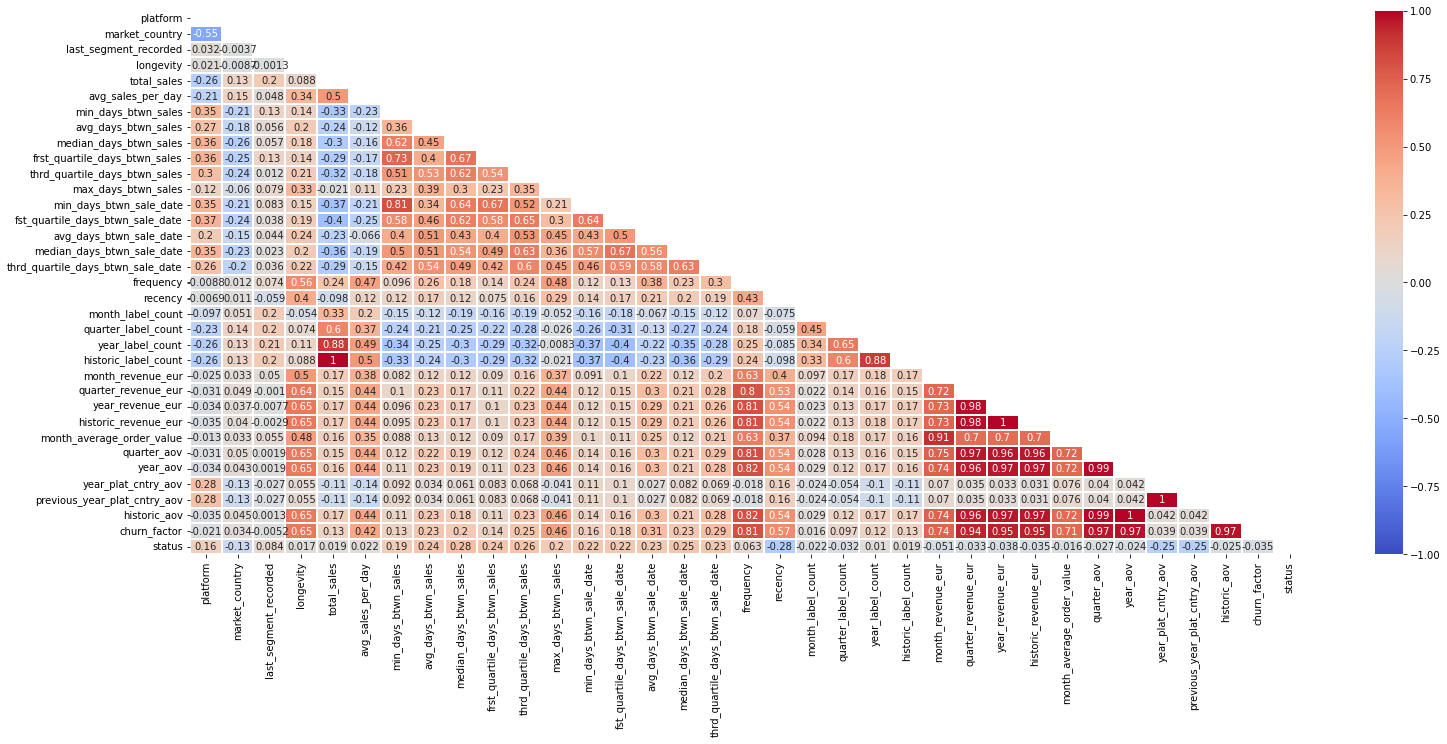

In [48]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [49]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

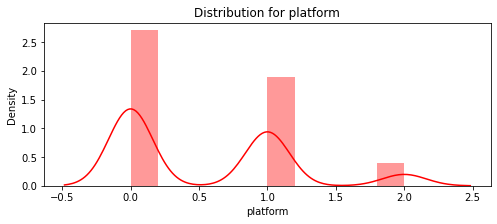

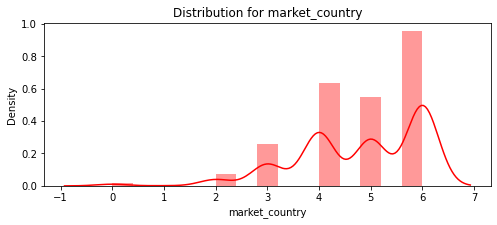

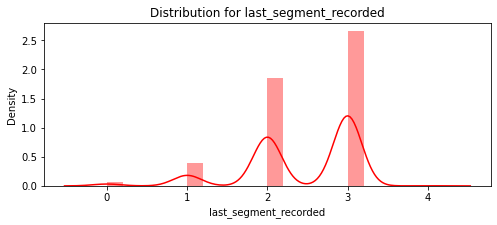

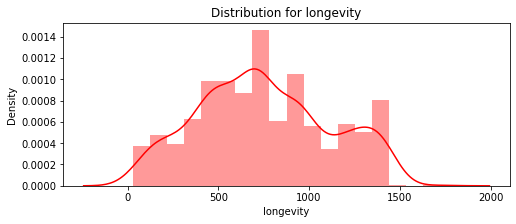

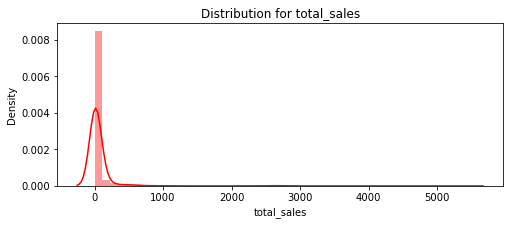

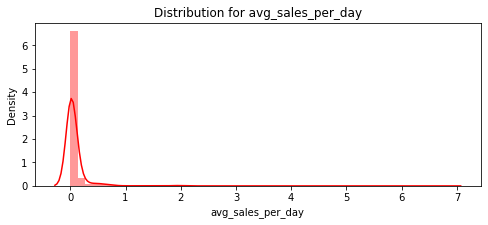

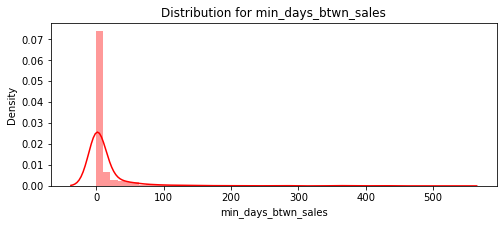

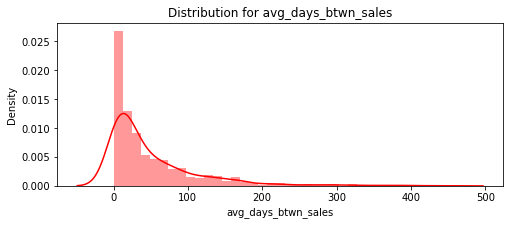

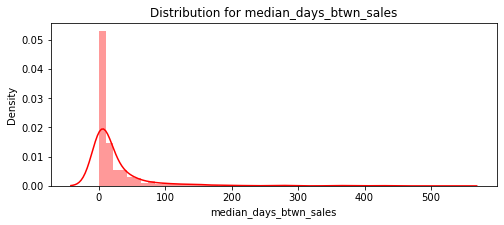

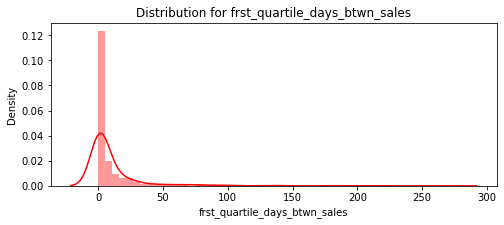

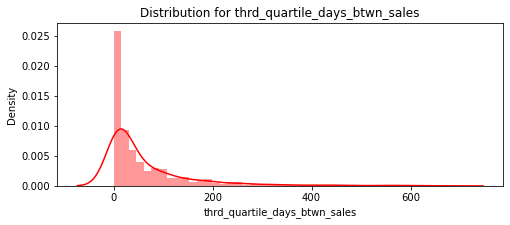

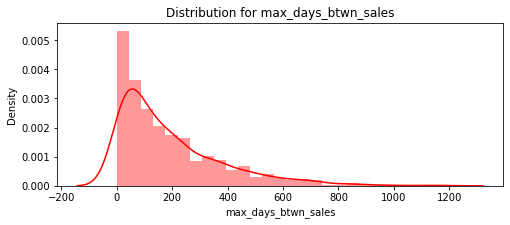

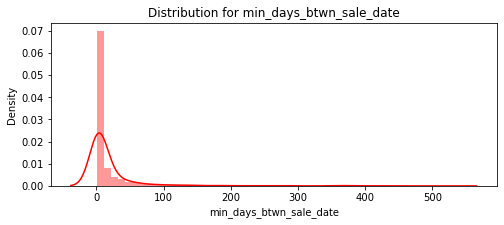

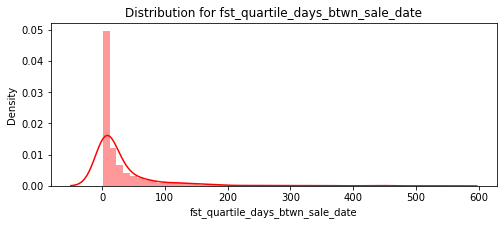

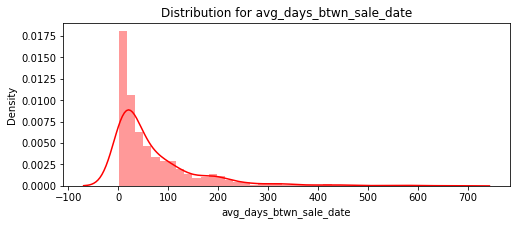

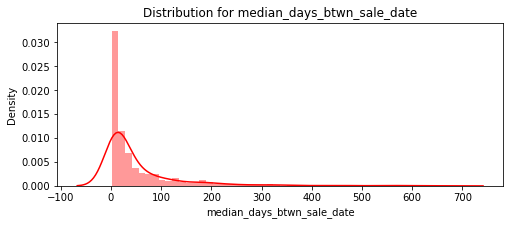

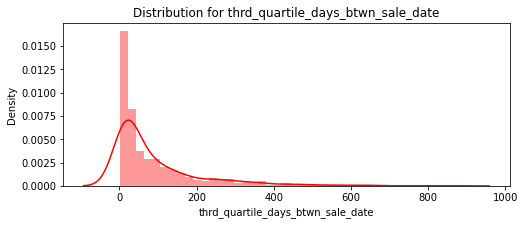

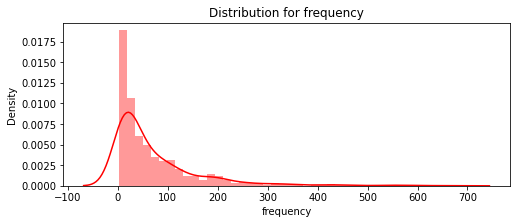

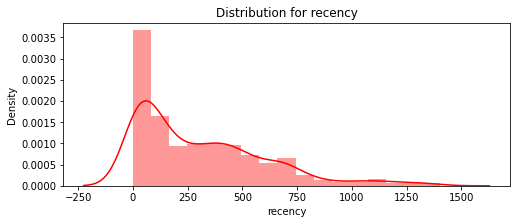

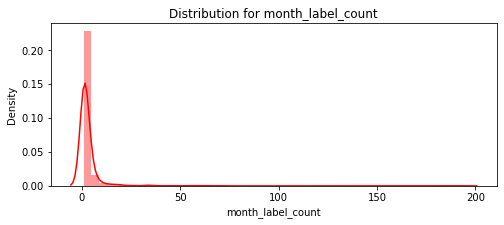

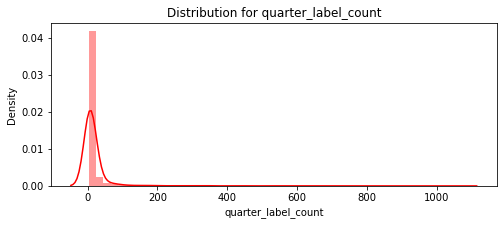

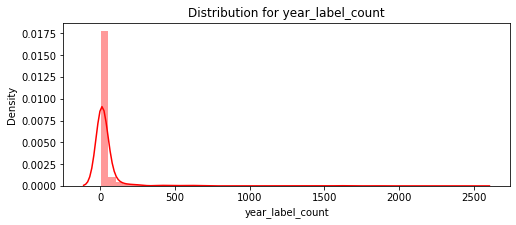

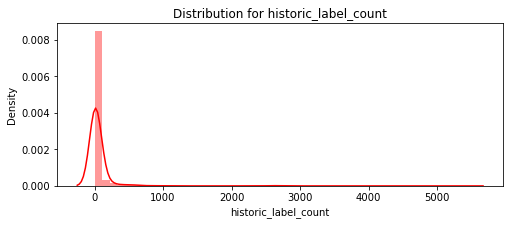

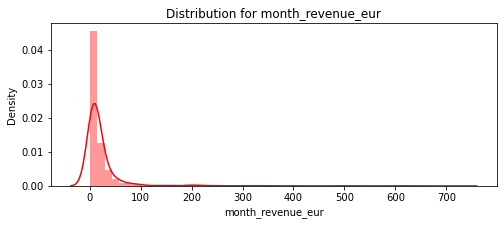

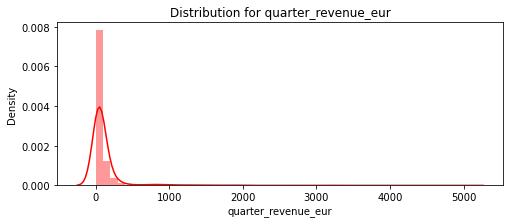

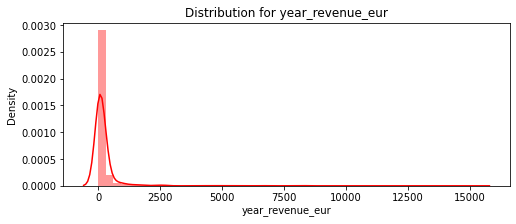

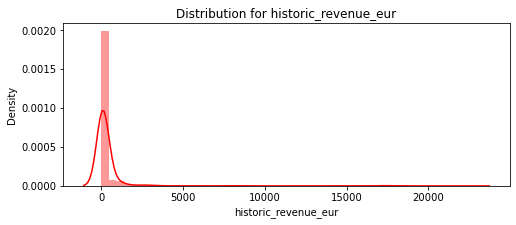

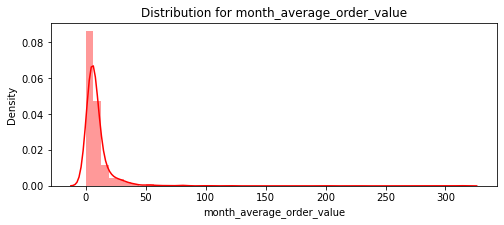

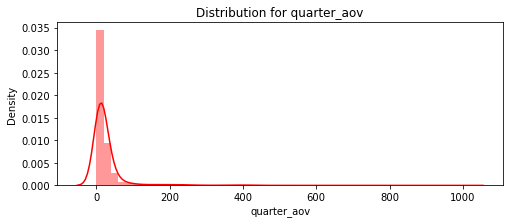

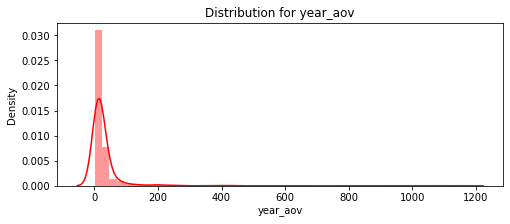

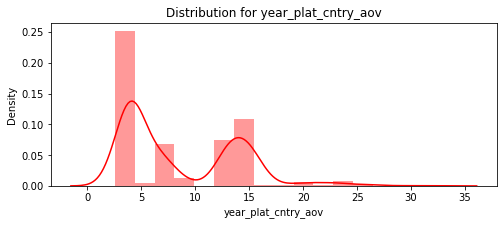

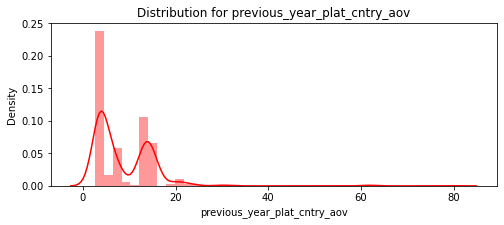

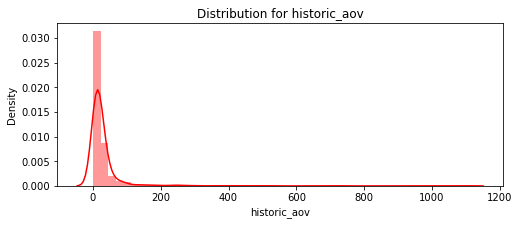

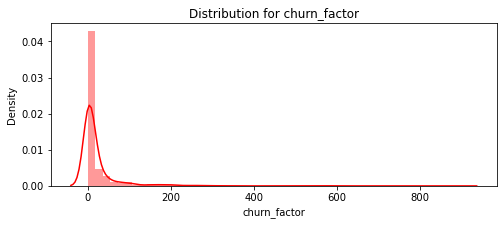

In [50]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


#Checking data set
num_cols = ['platform', 'market_country',
       'last_segment_recorded', 'longevity', 'total_sales',
       'avg_sales_per_day', 'min_days_btwn_sales', 'avg_days_btwn_sales',
       'median_days_btwn_sales', 'frst_quartile_days_btwn_sales',
       'thrd_quartile_days_btwn_sales', 'max_days_btwn_sales',
       'min_days_btwn_sale_date', 'fst_quartile_days_btwn_sale_date',
       'avg_days_btwn_sale_date', 'median_days_btwn_sale_date',
       'thrd_quartile_days_btwn_sale_date', 'frequency', 'recency',
       'month_label_count', 'quarter_label_count', 'year_label_count',
       'historic_label_count', 'month_revenue_eur', 'quarter_revenue_eur',
       'year_revenue_eur', 'historic_revenue_eur', 'month_average_order_value',
       'quarter_aov', 'year_aov', 'year_plat_cntry_aov',
       'previous_year_plat_cntry_aov', 'historic_aov', 'churn_factor']
for feat in num_cols: 
    distplot(feat, df)

In [51]:
X = df.drop(columns = ['status'])
y = df['status'].values

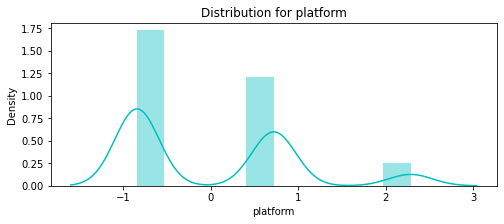

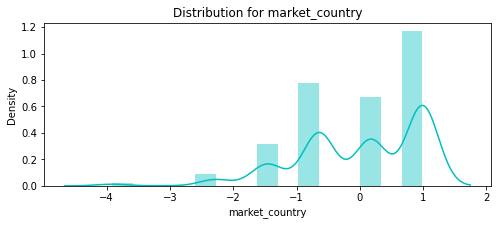

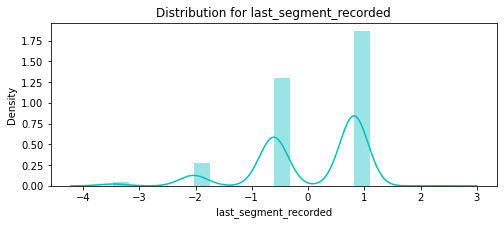

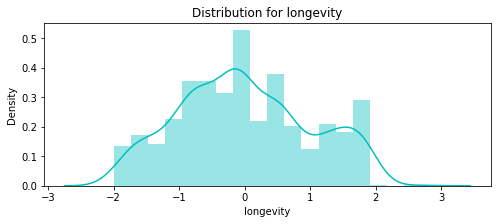

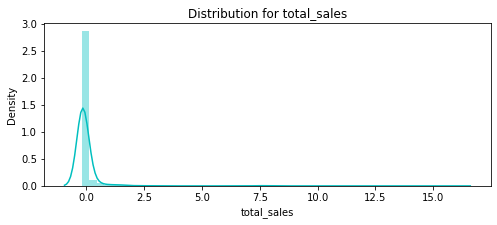

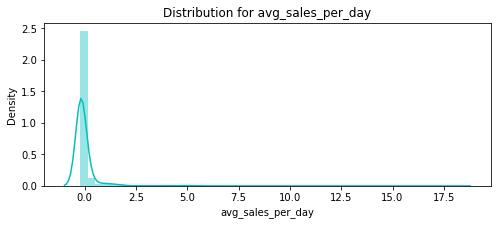

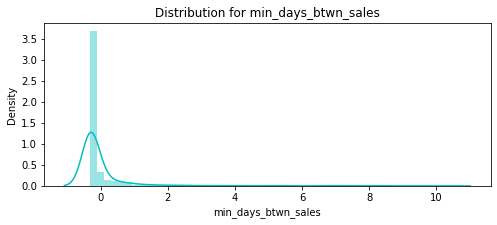

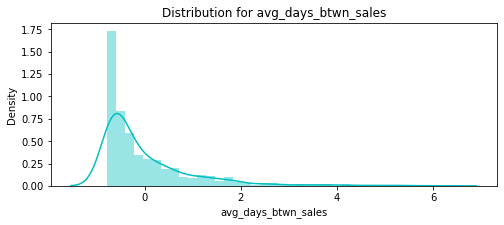

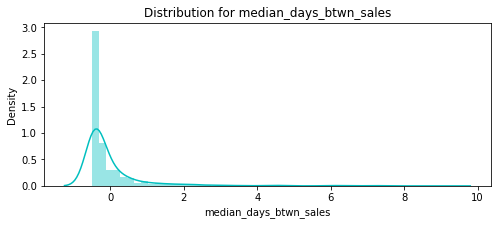

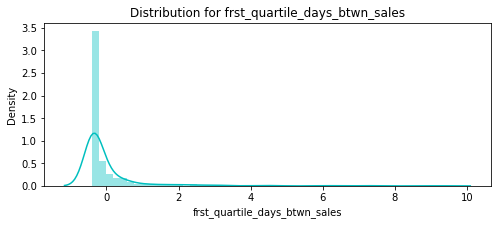

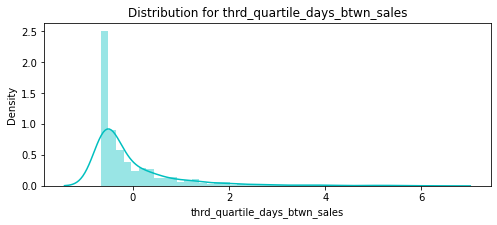

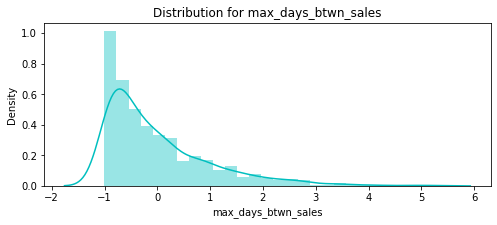

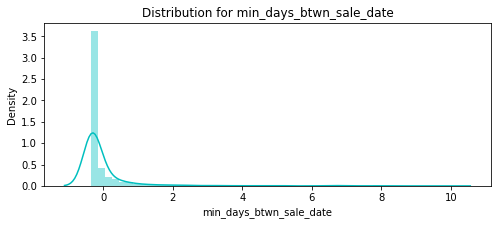

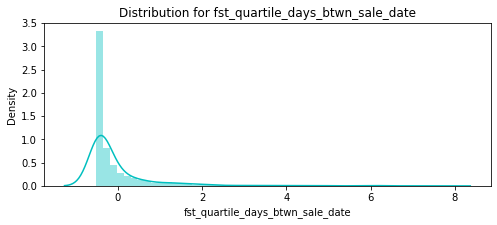

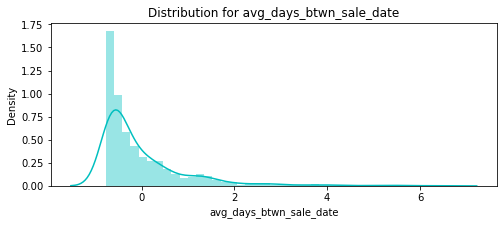

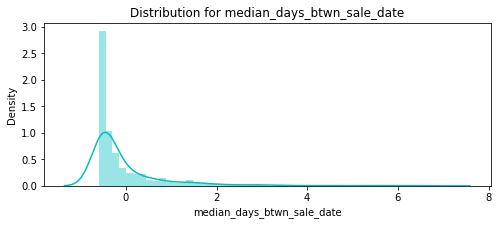

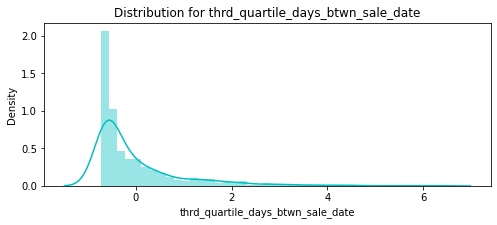

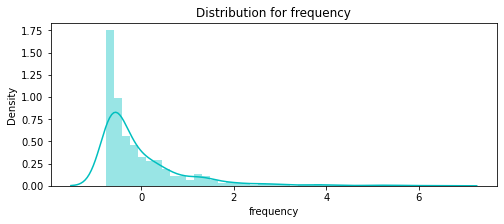

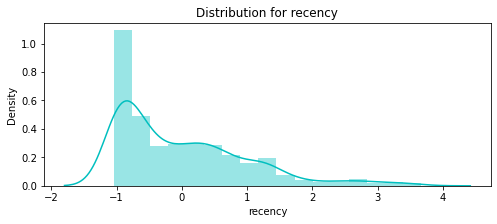

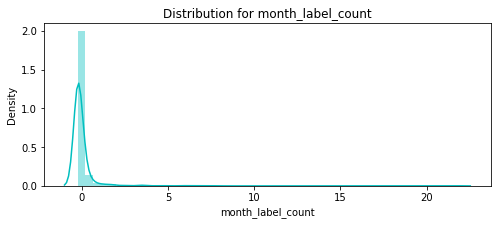

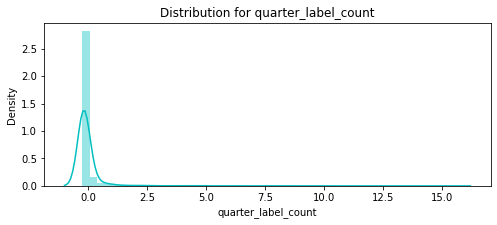

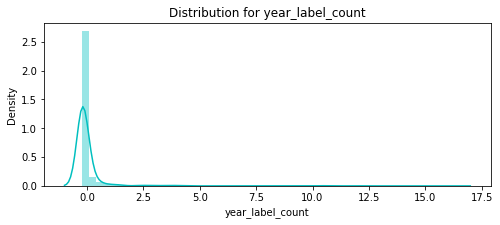

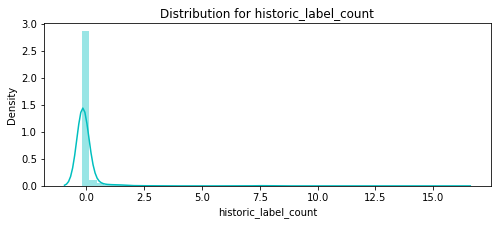

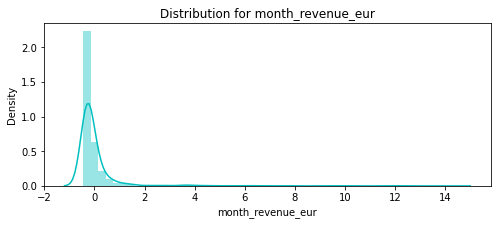

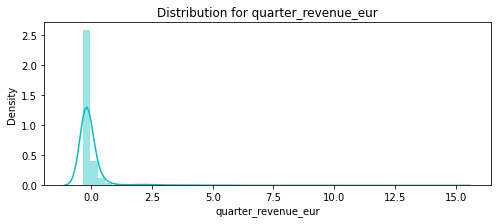

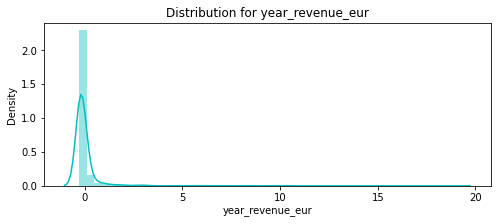

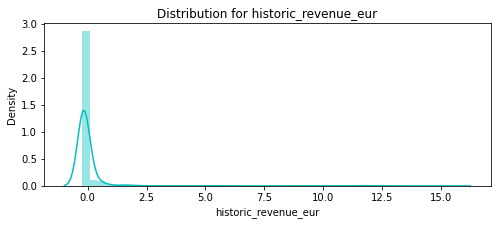

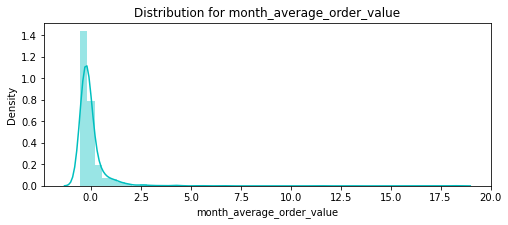

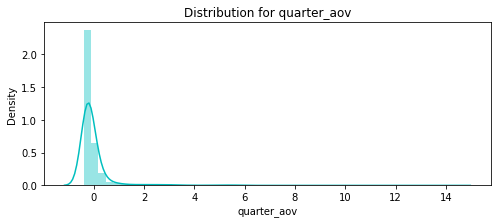

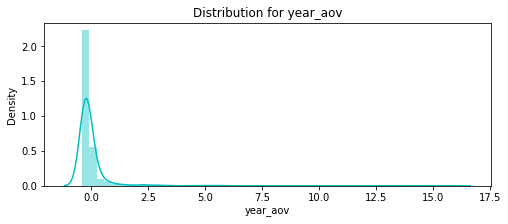

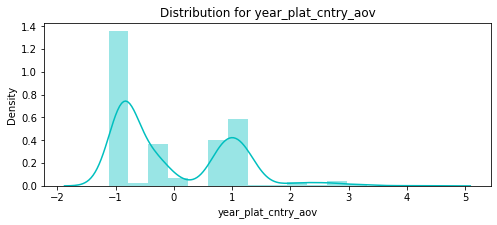

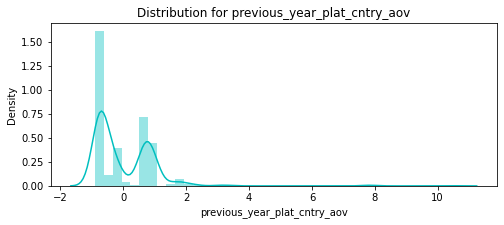

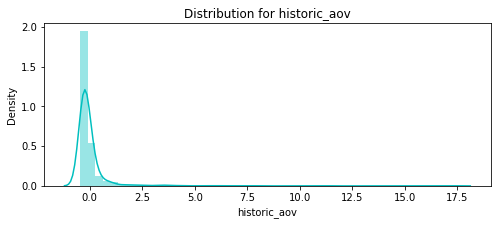

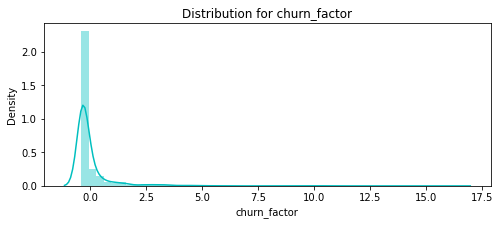

In [52]:
#Standardizing data

df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in num_cols: distplot(feat, df_std, color='c')

In [53]:
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40)

In [54]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [55]:
#Model Building

In [56]:
# KNN

knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.8513513513513513


In [57]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

     churned       0.89      0.81      0.85       156
          ok       0.81      0.89      0.85       140

    accuracy                           0.85       296
   macro avg       0.85      0.85      0.85       296
weighted avg       0.86      0.85      0.85       296



In [58]:
# SVC

svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.8885135135135135


In [59]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

     churned       0.97      0.81      0.89       156
          ok       0.82      0.97      0.89       140

    accuracy                           0.89       296
   macro avg       0.90      0.89      0.89       296
weighted avg       0.90      0.89      0.89       296



In [60]:
# Logistic regression

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.9459459459459459


In [61]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

     churned       0.96      0.94      0.95       156
          ok       0.93      0.96      0.94       140

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296



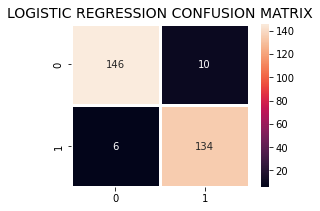

In [62]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

In [65]:
churn_scores = lr_model.predict_proba(df[X])[:, 1]

ValueError: Boolean array expected for the condition, not int32